## Dimensionality Reduction in Linear Regression

The idea is to reduce a matrix of features $X$ into a matrix with fewer columns $R(X)$ where the expected value of $Y$ given $X$ ($E(Y|X)$) is equal to the expected value of $Y$ given $R(X)$. 

If this is sounding a lot like PCA, you're right.  The difference is that instead of trying to reduce a set of $X$ into a smaller set $R(X)$ that contains all the variance in $X$, we are trying to reduce a set of $X$ into an $R(X)$ that contains all the variance in $X$ that is shared with $Y$. 

### Partial least squares regression (PLSR)

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [9]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



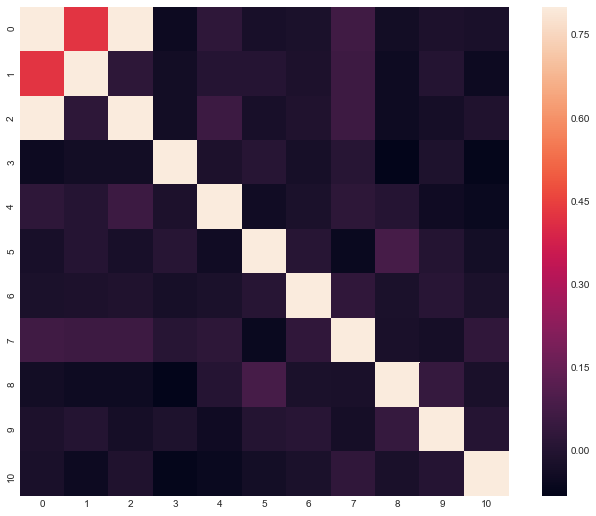

In [10]:


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [11]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


R-squared regression: 0.8382701078063901


In [12]:

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


R-squared PLSR: 0.8382676607196095


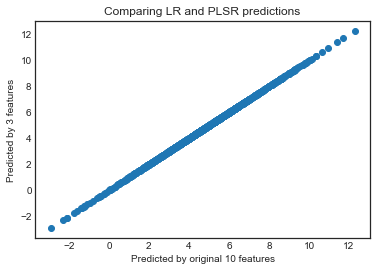

In [13]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Reduce feature space to 7 dimensions.

R-squared PLSR: 0.8382701078063898


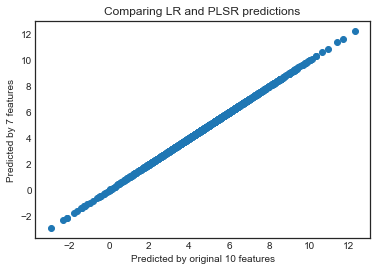

In [15]:

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 7 dimensions.
pls1 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 7 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Reduce feature space to 5 dimensions.

R-squared PLSR: 0.838270107772034


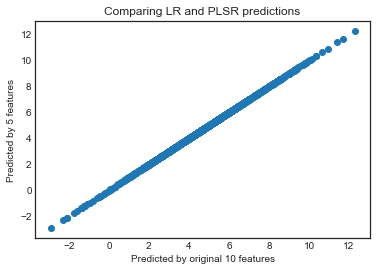

In [16]:

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 5 dimensions.
pls1 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Reduce feature space to 2 dimensions.

R-squared PLSR: 0.8380069088787199


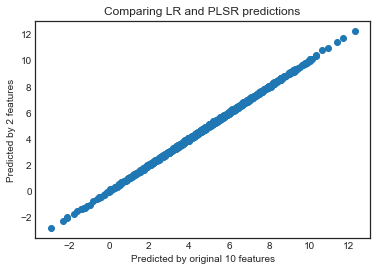

In [17]:

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls1 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

**By reducing the number of components, $R2$ goes down, but by a very small number.**

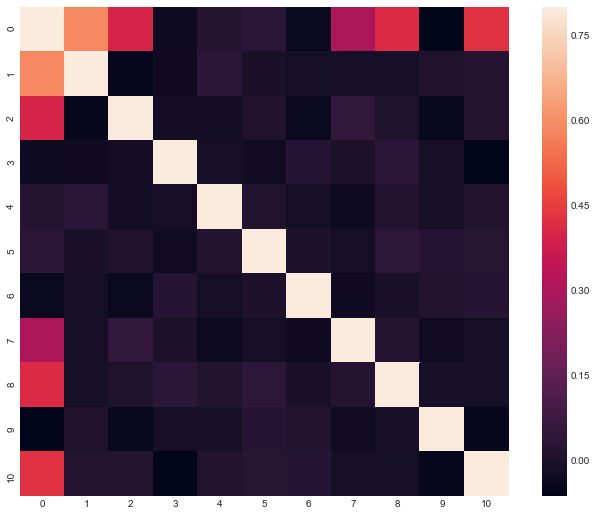

In [33]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = 3*X[:, 0] + 2 * X[:, 1] + 1.5*X[:,6] + 2 * X[:, 7] + 2 * X[:, 9] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.9608390266382442
R-squared PLSR: 0.9608389826679361


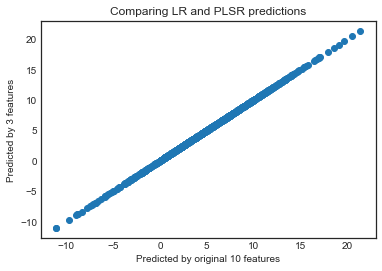

In [28]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.9608390266382442
R-squared PLSR: 0.9608390266376645


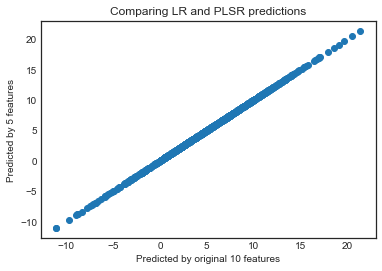

In [31]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 5 dimensions.
pls1 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

If we increase the number of features that are correlated, $R2$ increases!